In [9]:
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import numpy as np
from keras import backend as K
import keras
import cv2
from Utils import *
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import *
from keras.applications.mobilenet_v2 import MobileNetV2
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.models import model_from_json
import matplotlib.pyplot as plt
import os
from PIL import Image
import pytesseract

In [16]:
directory = "/home/nitin/Desktop/banglore/fresh_solution/package_images/"

for folder in tqdm(os.listdir(directory)):
    for img in tqdm(os.listdir(directory+folder)):
        if not str(folder).startswith("."):

            img_name = directory+folder+"/"+img

            img = cv2.imread(img_name) 
            stretch_near = cv2.resize(img, (1000, 1000),interpolation = cv2.INTER_NEAREST) 
            im = cv2.bilateralFilter(np.array( img,dtype=np.uint8),9,70,70)
            imb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            im = cv2.adaptiveThreshold(imb, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 35 ,3)

            filename = img_name.split(".")[0] + "_new." + img_name.split(".")[1]
            cv2.imwrite(filename, im) 

100%|██████████| 5/5 [00:01<00:00,  4.23it/s]


In [12]:
#Variable Definition
img_w = 512
img_h = 512
channels = 3
classes = 1
info = 5
grid_w = 16
grid_h = 16

In [4]:
def load_model(strr):        
    json_file = open(strr, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    return loaded_model


In [5]:
model = load_model('model1/text_detect_model.json')
model.load_weights('model1/text_detect.h5')

In [6]:
def predict_func(model , inp , iou , name, l, k):

    ans = model.predict(inp)
    
    #np.save('Results/ans.npy',ans)
    boxes = decode(ans[0] , img_w , img_h , iou)
    
    img = ((inp + 1)/2)
    img = img[0]
    #plt.imshow(img)
    #plt.show()
    j=1
    
    for i in boxes:
    
        i = [int(x) for x in i]

        img = cv2.rectangle(img , (i[0] ,i[1]) , (i[2] , i[3]) , color = (0,255,0) , thickness = 2)
        crop_img = img[i[1]:i[3], i[0]:i[2]]

        
        cv2.imwrite(os.path.join(k , l.split(".")[0] + "_"+ str(j)+'.jpg') , crop_img*255.0)
        plt.imshow(crop_img)
        plt.show()
        j = j+1
        

         
     


  0%|          | 0/12 [00:00<?, ?it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/3/01_new_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


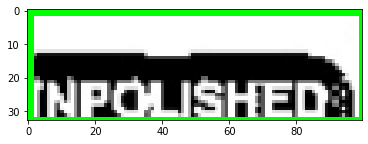

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


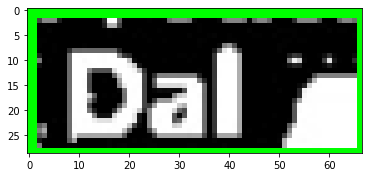

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


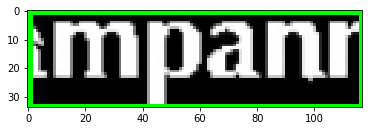

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


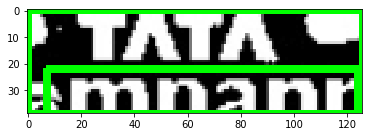

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


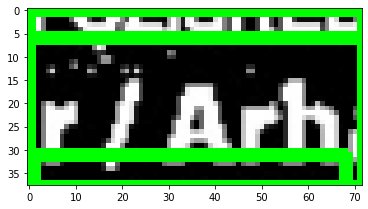


  8%|▊         | 1/12 [00:01<00:19,  1.78s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/3/02_new_new_new.jpg


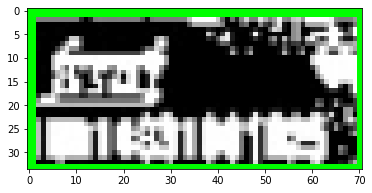

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


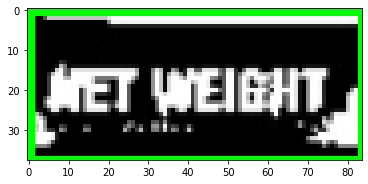

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


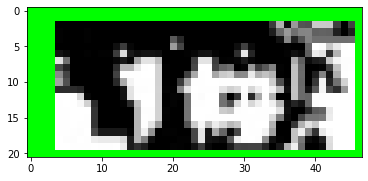

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


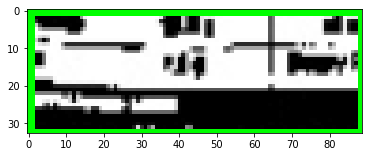


 17%|█▋        | 2/12 [00:02<00:14,  1.40s/it]

/home/nitin/Desktop/banglore/fresh_solution/package_images/3/02_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


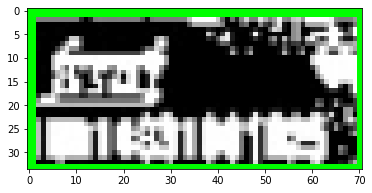

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


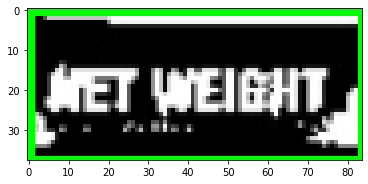

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


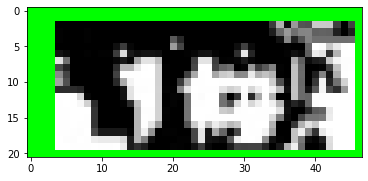

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


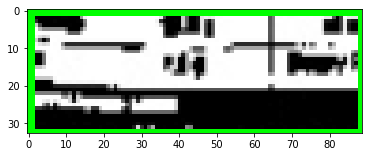


 25%|██▌       | 3/12 [00:02<00:10,  1.14s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/3/03_new_new_new.jpeg


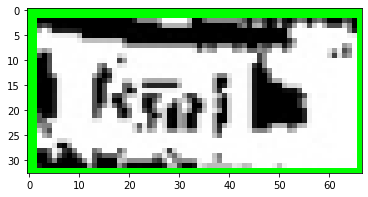

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


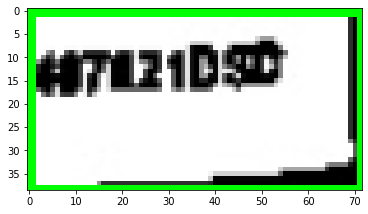

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


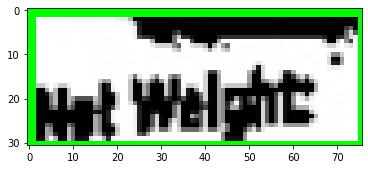

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


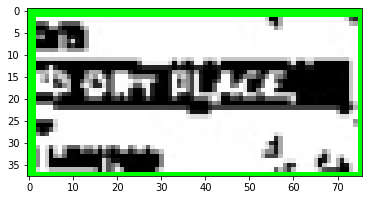

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


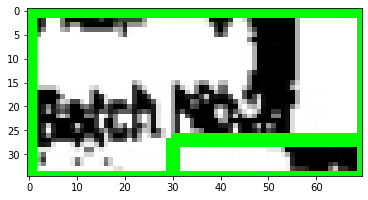

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


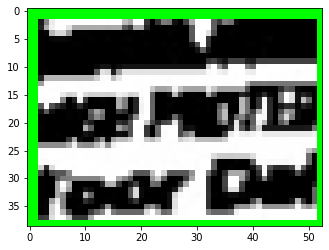


 42%|████▏     | 5/12 [00:03<00:06,  1.10it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/3/01_new.jpg


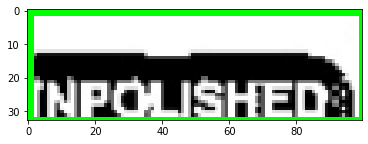

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


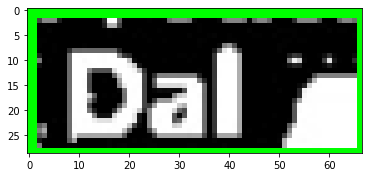

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


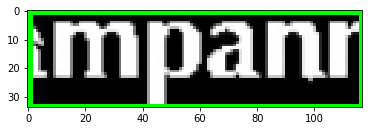

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


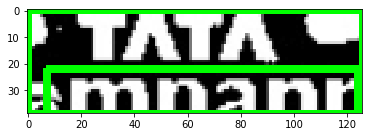

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


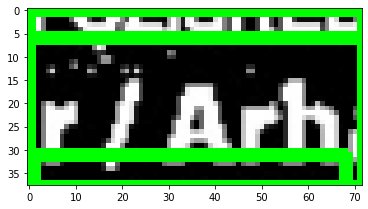


 50%|█████     | 6/12 [00:04<00:05,  1.19it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/3/01_new_new_new.jpg


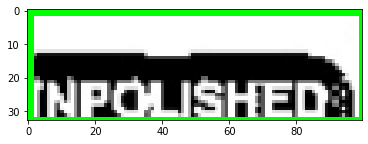

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


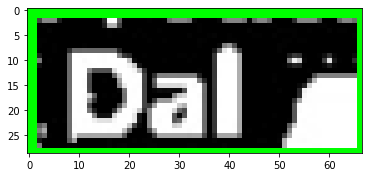

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


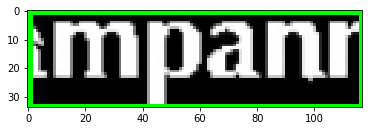

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


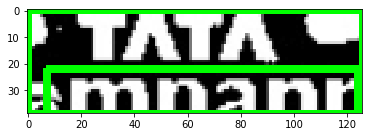

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


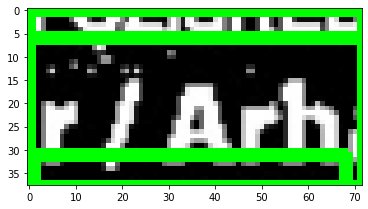


 67%|██████▋   | 8/12 [00:04<00:02,  1.47it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/3/03_new_new.jpeg


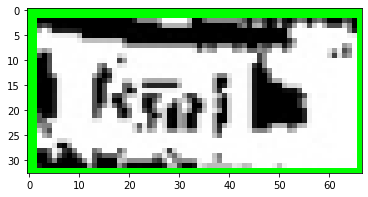

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


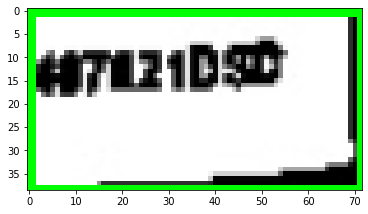

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


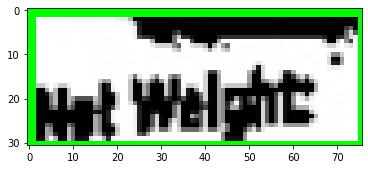

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


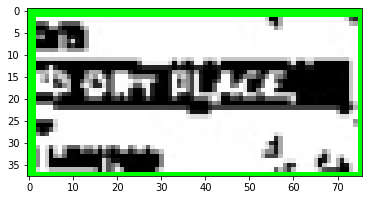

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


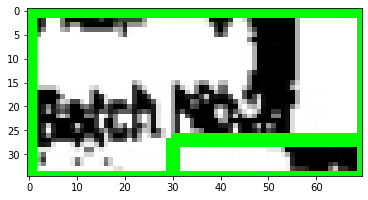

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


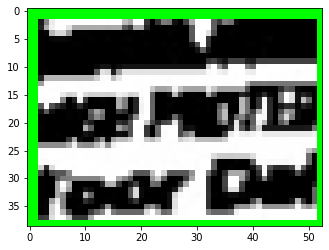


 83%|████████▎ | 10/12 [00:05<00:01,  1.70it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/3/03_new.jpeg


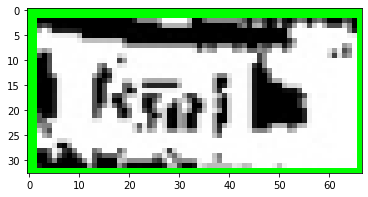

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


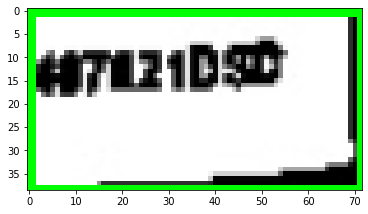

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


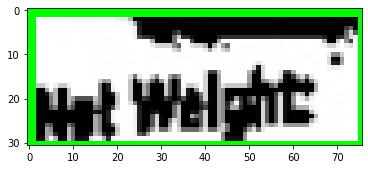

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


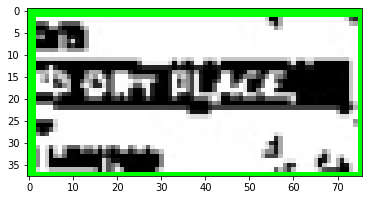

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


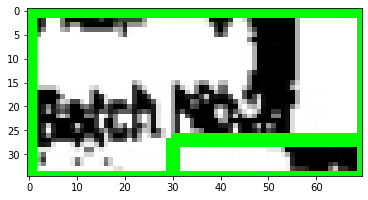

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


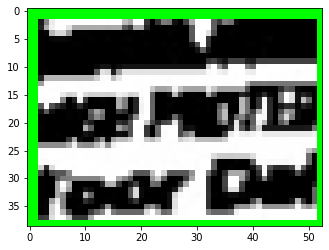


 92%|█████████▏| 11/12 [00:06<00:00,  1.58it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/3/02_new_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


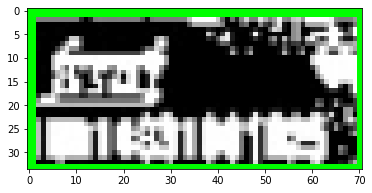

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


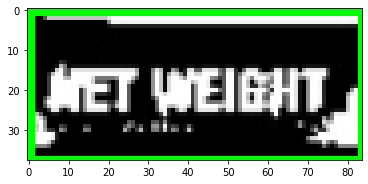

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


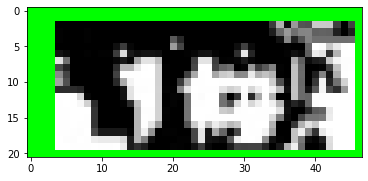

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


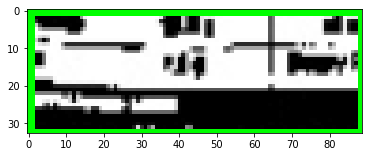


  0%|          | 0/12 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/5/01_new_new.jpeg


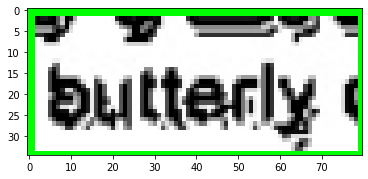

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


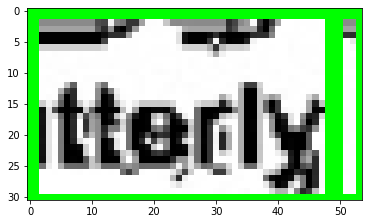

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


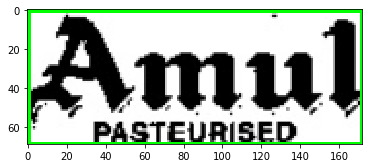

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


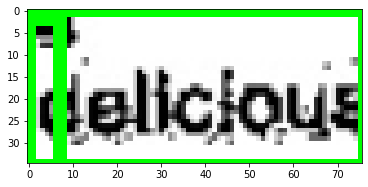

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


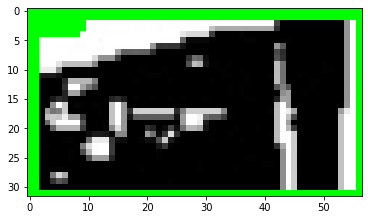

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


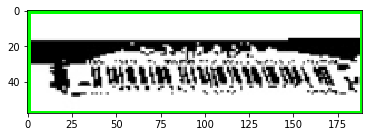

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


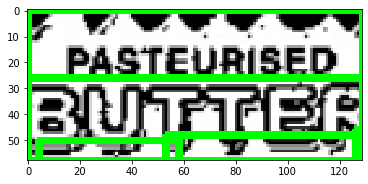


 17%|█▋        | 2/12 [00:00<00:04,  2.43it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/5/02_new_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


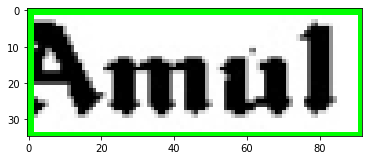


 25%|██▌       | 3/12 [00:01<00:03,  2.68it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/5/02_new_new_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


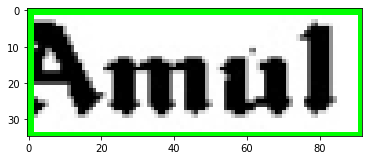


 33%|███▎      | 4/12 [00:01<00:02,  2.80it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/5/03_new_new_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


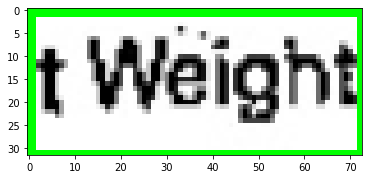

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


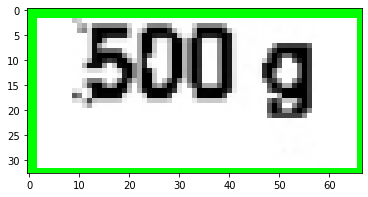

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


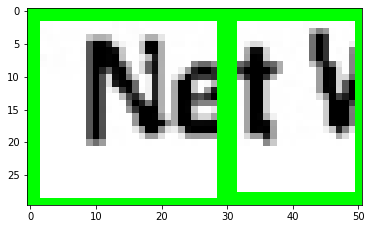

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


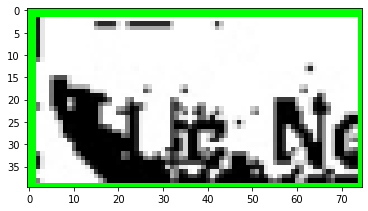

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


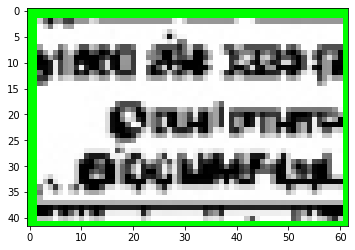

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


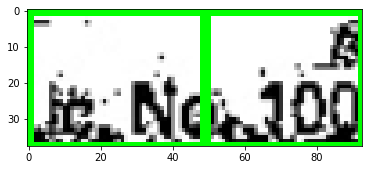


 42%|████▏     | 5/12 [00:02<00:03,  1.99it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/5/02_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


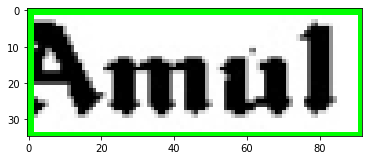


 50%|█████     | 6/12 [00:02<00:02,  2.24it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/5/01_new_new_new.jpeg


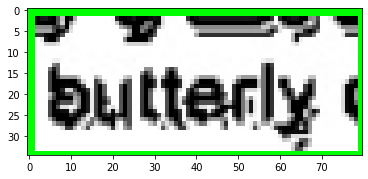

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


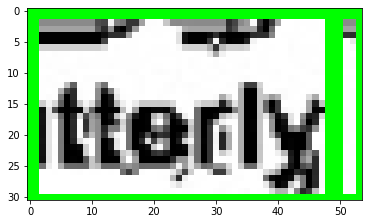

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


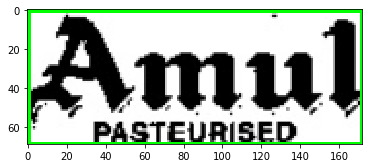

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


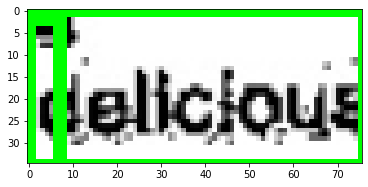

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


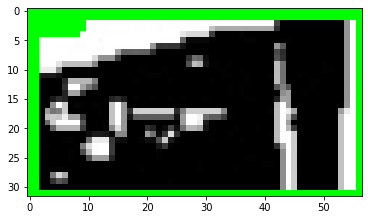

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


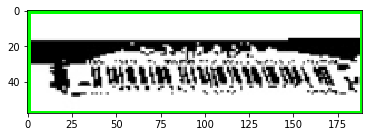

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


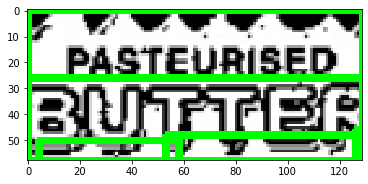


 75%|███████▌  | 9/12 [00:03<00:01,  2.53it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/5/03_new_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


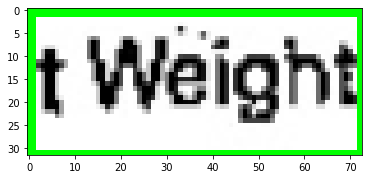

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


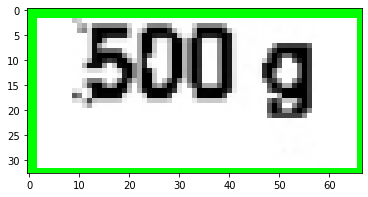

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


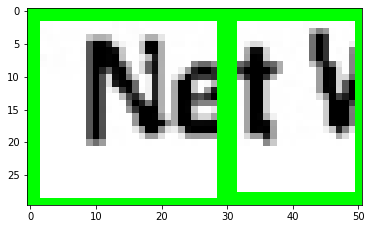

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


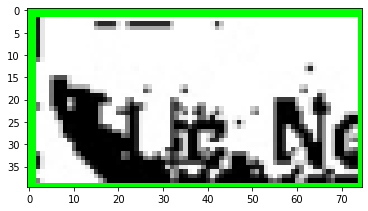

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


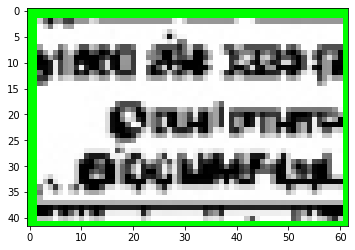

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


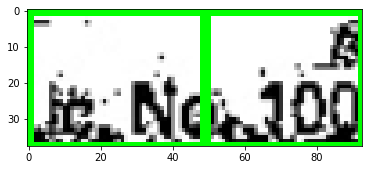


 83%|████████▎ | 10/12 [00:04<00:01,  1.97it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/5/01_new.jpeg


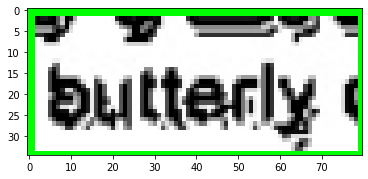

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


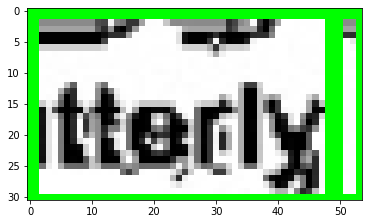

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


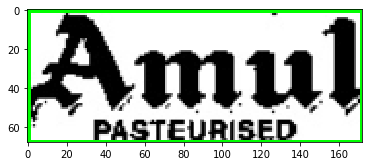

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


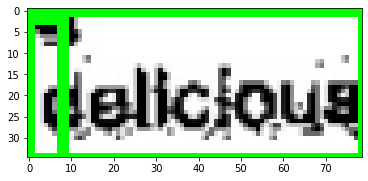

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


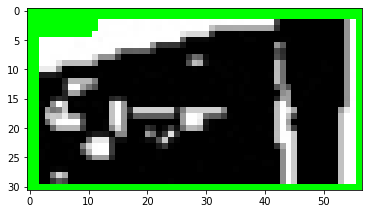

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


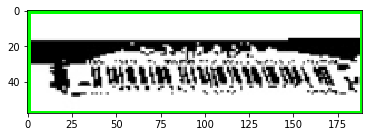

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


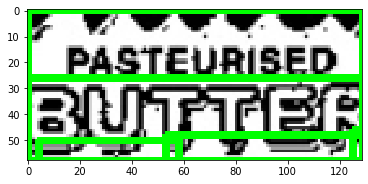


 92%|█████████▏| 11/12 [00:04<00:00,  1.70it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/5/03_new.jpeg


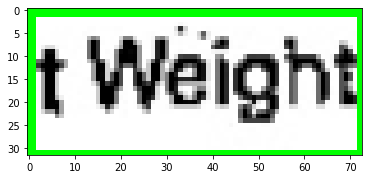

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


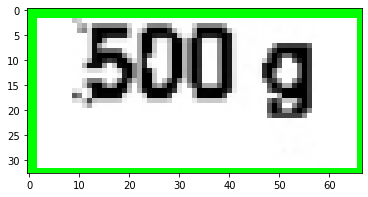

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


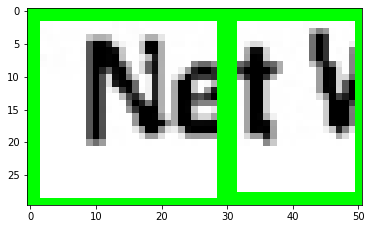

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


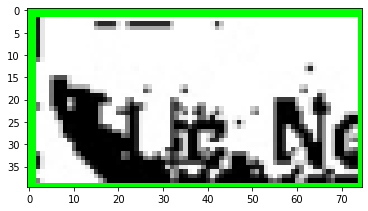

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


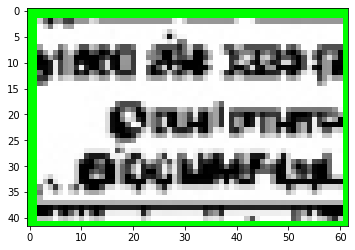

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


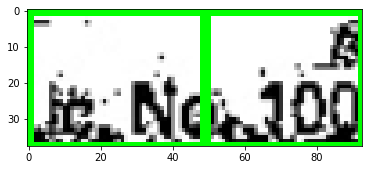


  0%|          | 0/8 [00:00<?, ?it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/2/01_new_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


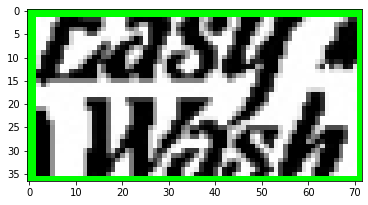

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


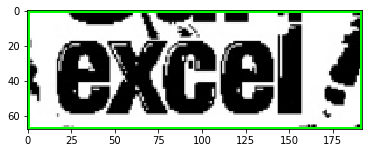

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


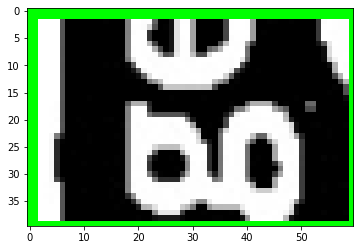


 12%|█▎        | 1/8 [00:00<00:04,  1.41it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/2/02_new_new_new.jpg


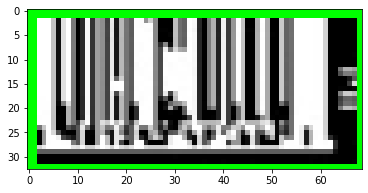

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


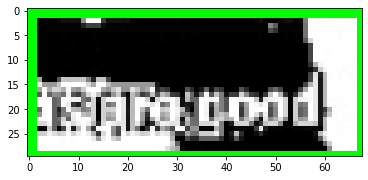

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


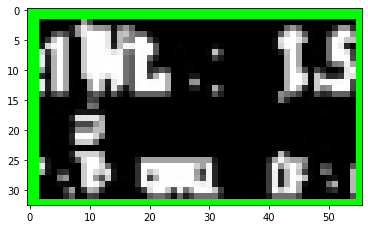


 25%|██▌       | 2/8 [00:01<00:03,  1.56it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/2/02_new.jpg


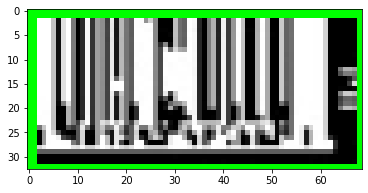

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


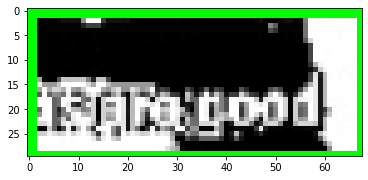

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


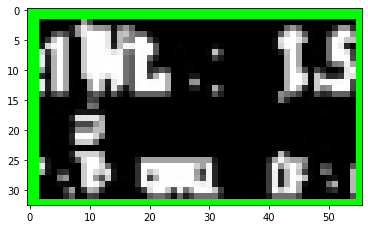


 38%|███▊      | 3/8 [00:01<00:02,  1.73it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/2/01_new.jpg


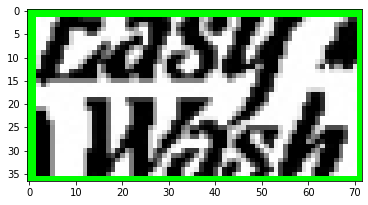

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


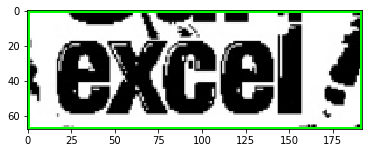

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


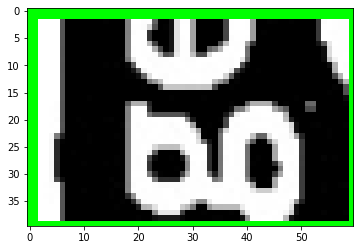


 62%|██████▎   | 5/8 [00:02<00:01,  2.12it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/2/01_new_new_new.jpg


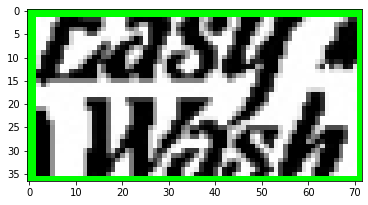

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


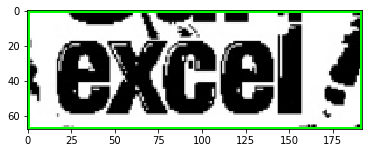

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


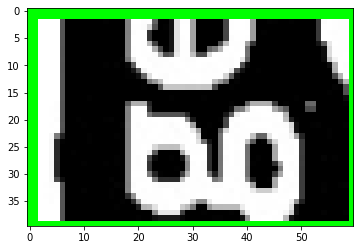


 75%|███████▌  | 6/8 [00:02<00:00,  2.12it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/2/02_new_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


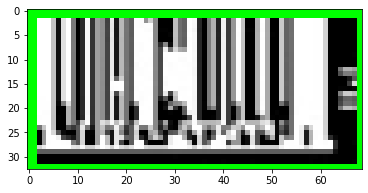

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


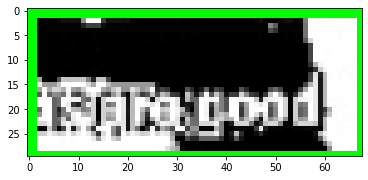

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


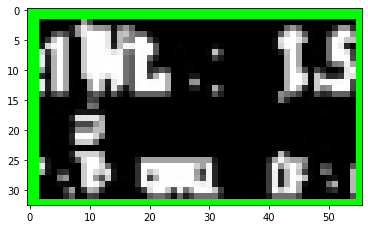


  0%|          | 0/6 [00:00<?, ?it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/4/01_new_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


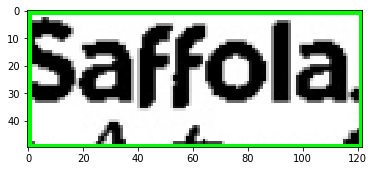

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


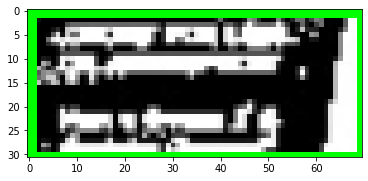

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


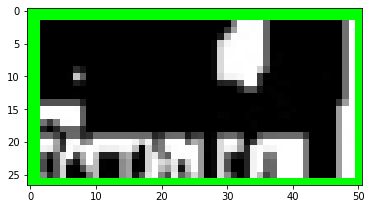

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


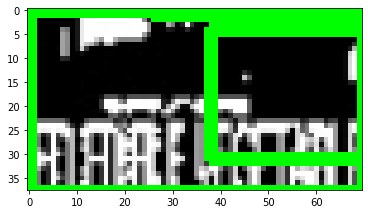

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


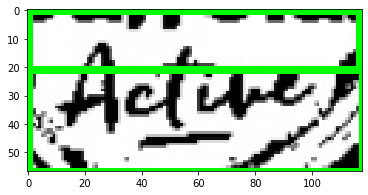


 17%|█▋        | 1/6 [00:00<00:03,  1.59it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/4/02_new.jpg


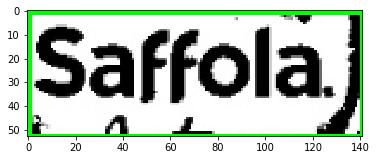

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


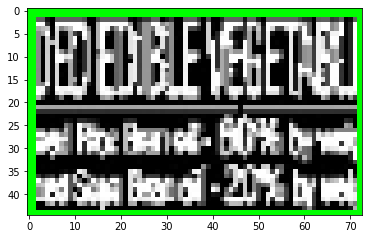

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


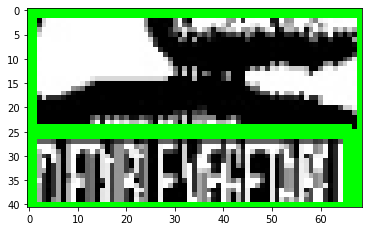

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


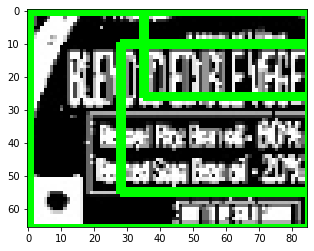

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


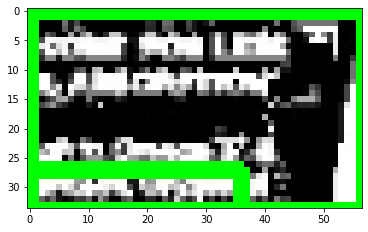

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


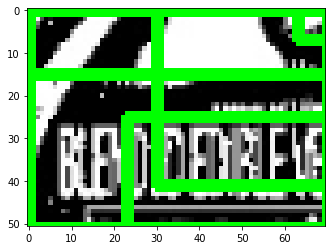


 33%|███▎      | 2/6 [00:01<00:02,  1.49it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/4/01_new.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


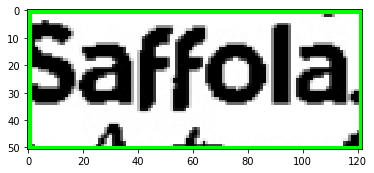

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


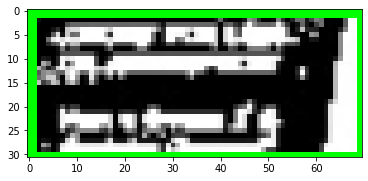

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


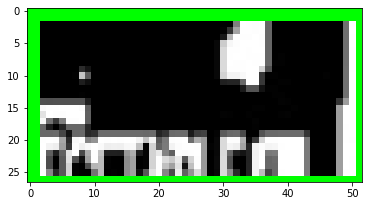

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


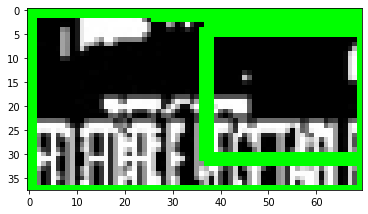

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


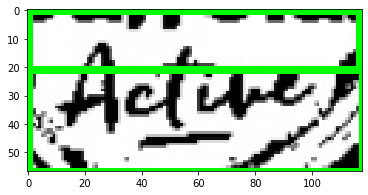


 67%|██████▋   | 4/6 [00:02<00:01,  1.72it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/4/02_new_new.jpg


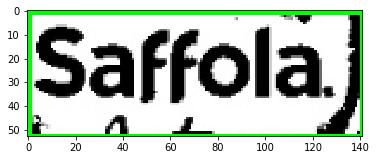

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


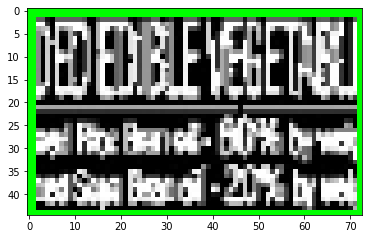

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


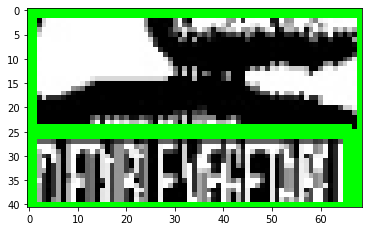

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


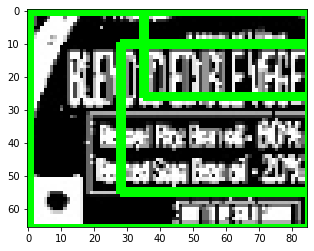

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


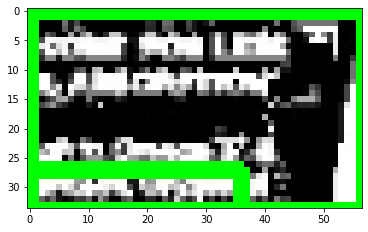

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


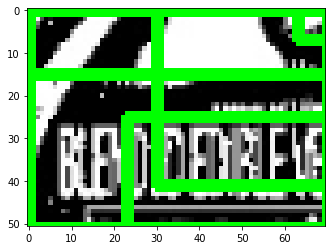


  0%|          | 0/9 [00:00<?, ?it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/1/2_new.jpeg


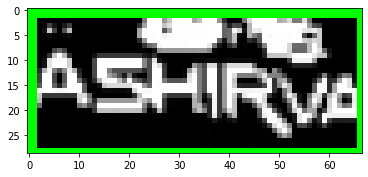

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


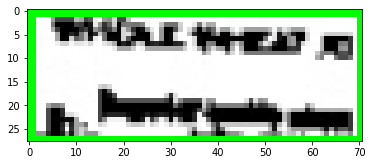

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


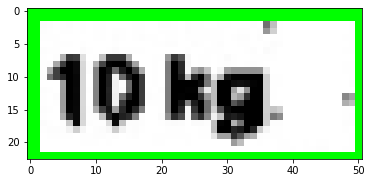

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


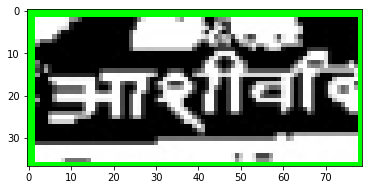

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


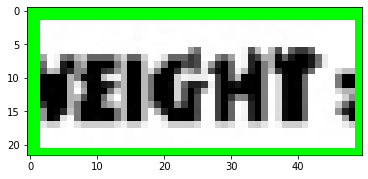

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


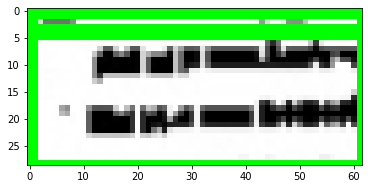

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


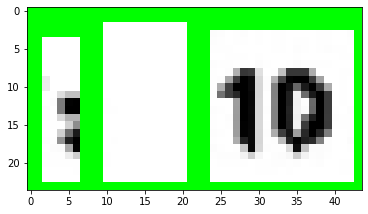

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


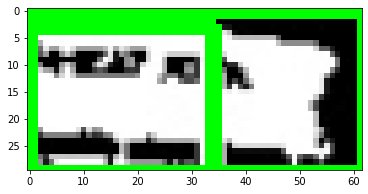

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


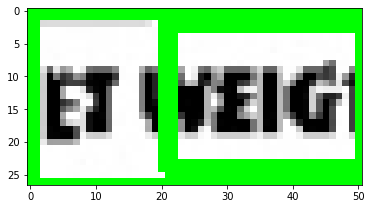

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


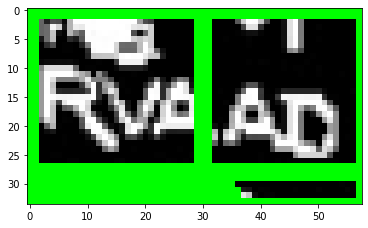

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


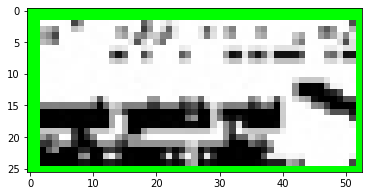

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


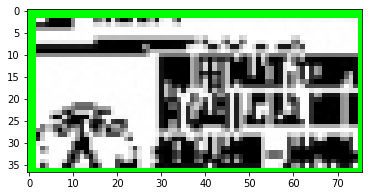


 11%|█         | 1/9 [00:01<00:09,  1.21s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/1/01_new_new.jpeg


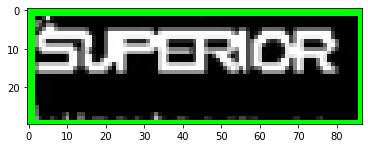

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


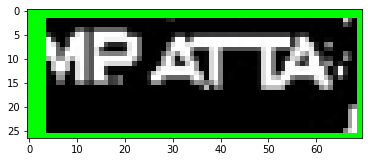

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


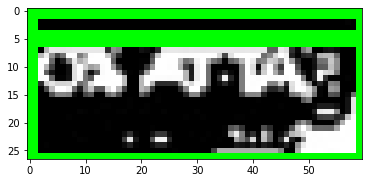

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


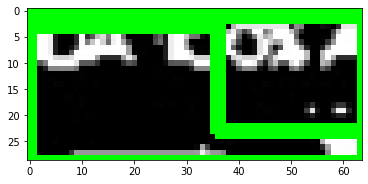

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


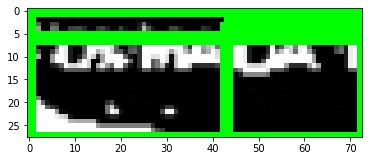

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


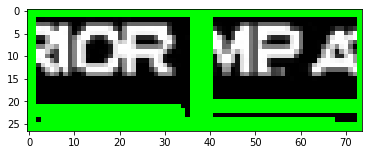


 44%|████▍     | 4/9 [00:01<00:04,  1.09it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/1/2_new_new.jpeg


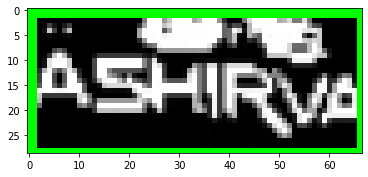

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


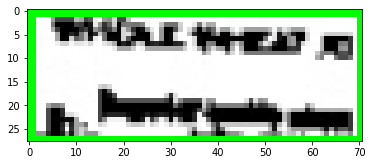

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


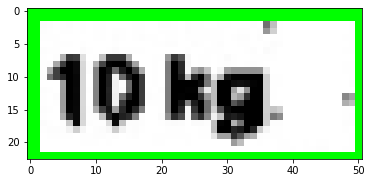

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


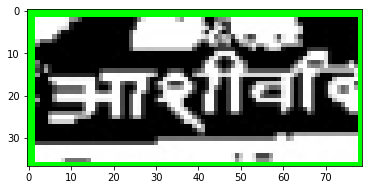

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


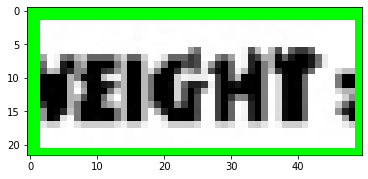

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


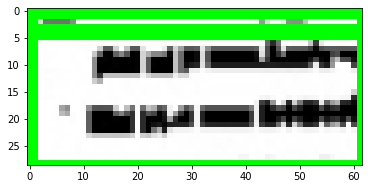

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


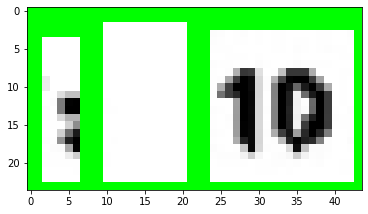

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


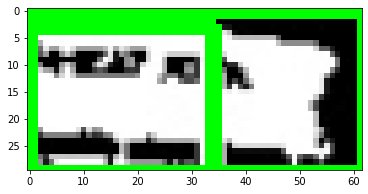

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


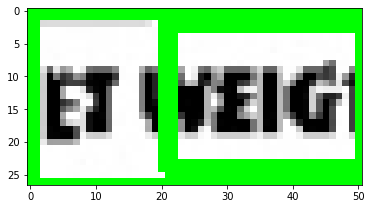

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


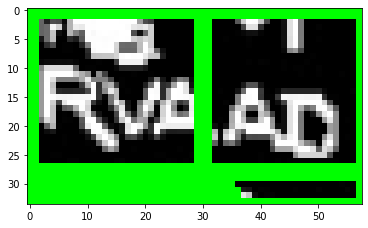

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


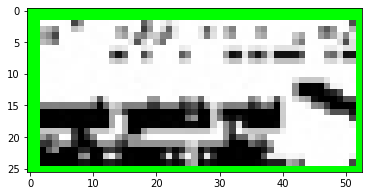

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


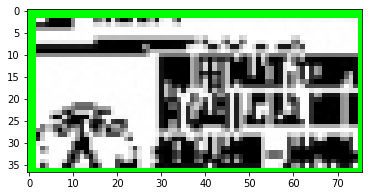


 67%|██████▋   | 6/9 [00:03<00:02,  1.18it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/1/03_new_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


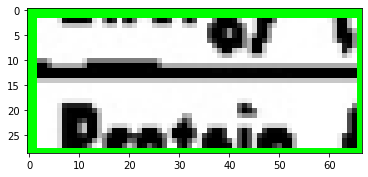

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


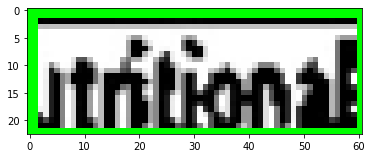

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


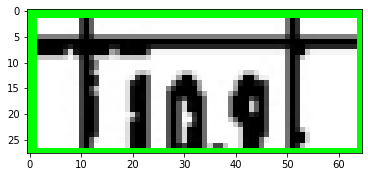

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


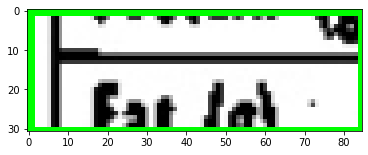

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


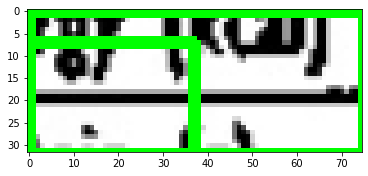

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


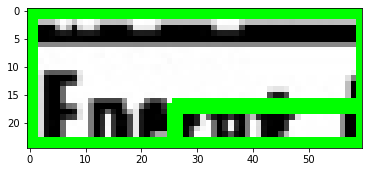

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


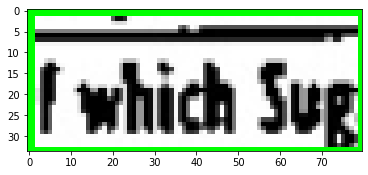


 78%|███████▊  | 7/9 [00:04<00:01,  1.20it/s]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/nitin/Desktop/banglore/fresh_solution/package_images/1/01_new.jpeg


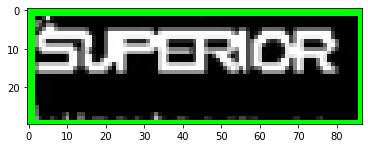

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


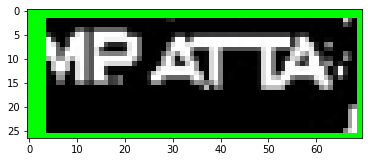

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


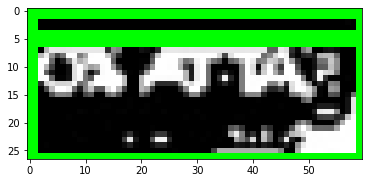

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


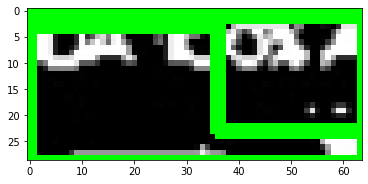

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


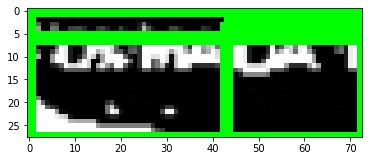

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


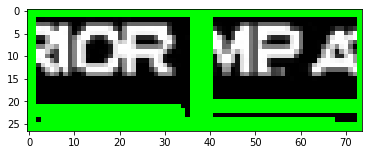


 89%|████████▉ | 8/9 [00:04<00:00,  1.26it/s]

/home/nitin/Desktop/banglore/fresh_solution/package_images/1/03_new.jpeg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


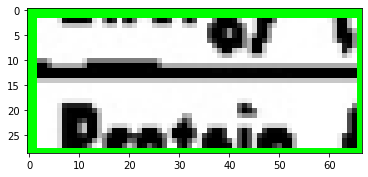

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


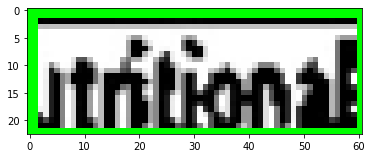

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


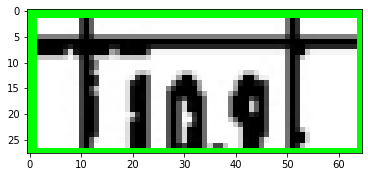

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


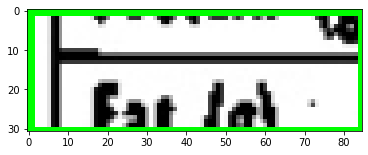

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


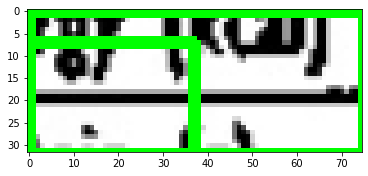

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


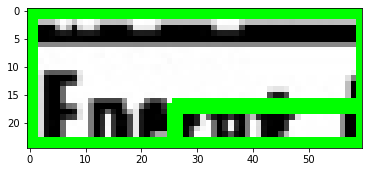

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


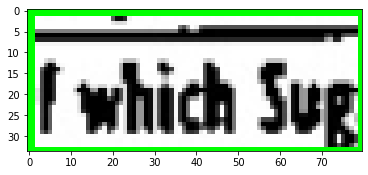


100%|██████████| 5/5 [00:24<00:00,  4.85s/it]


In [8]:
directory = "/home/nitin/Desktop/banglore/fresh_solution/package_images/"

for folder in tqdm(os.listdir(directory)):
    os.mkdir("/home/nitin/Desktop/banglore/fresh_solution/Results/"+folder)

    for img in tqdm(os.listdir(directory+folder)):
        if not str(folder).startswith(".") and "new" in str(img):

            k = "/home/nitin/Desktop/banglore/fresh_solution/Results/"+folder+"/"+img.split(".")[0]
            l = str(img)
            os.mkdir(k)


            img_name = directory+folder+"/"+img

            print(img_name)

            
            img = cv2.imread(img_name) 
            img = cv2.resize(img,(512,512))
            img = (img - 127.5)/127.5
            
            predict_func(model , np.expand_dims(img,axis= 0) , 0.5 , 'sample', l, k)
            
        
            

In [ ]:
Text = []
File = []

directory = "/home/nitin/Desktop/banglore/fresh_solution/Results/"

for folder in tqdm(os.listdir(directory)):
    for folder2 in tqdm(os.listdir(directory+folder)):
        for img in tqdm(os.listdir(directory+folder+"/"+folder2)):
            if not str(folder).startswith("."):
                #print(directory+folder+"/"+folder2+"/"+img)
                im = Image.open(directory+folder+"/"+folder2+"/"+img)
                newsize = (1000, 1000) 
                im1 = im.resize(newsize)
                text = pytesseract.image_to_string(im1,lang="eng")
                Text.append(text)
                File.append(folder+"/"+folder2+"/"+img)
                
    
    
            


In [ ]:
text = pd.DataFrame(Text)
file = pd.DataFrame(File)
df = pd.concat([file,text],axis =1)
df.to_csv("new1.csv")
